# Tugas #

2. Buatlah model CNN untuk klasifikasi dataset MNIST.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 5s 0us/step
Epoch 1/10
1875/1875 [==============================] - 70s 36ms/step - loss: 0.1508 - accuracy: 0.9542 - val_loss: 0.0441 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0359 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0317 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0317 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0393 - val_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 1

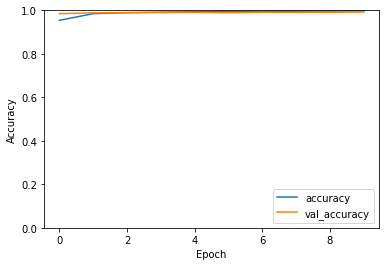

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()